In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import math
import numpy as np
import seaborn as sns
import json

In [2]:
%config InlineBackend. figure_format = 'retina'

In [3]:
def cartesian_to_spherical(x, y, z):
    rho = math.sqrt(x**2 + y**2 + z**2)
    theta = math.atan2(y, x) # 經度
    phi = math.acos(z / rho) # 緯度
    return theta, phi

In [4]:
### heat 是只有shared screen，heat 2只有speaker's video。heat+heat2是全部

In [5]:
### 讀資料
heat=np.zeros((314, 314)) # Shared Screen
heat2=np.zeros((314, 314)) # Speaker's Video
f = open("../AllWindowData.json")
data = json.load(f)
for i in data["windowDatas"]:
    # find corners
    userId=i['userId']
    a=i['type']
    corners = i["corner"]
    case = i['caseNum']
    mode = i['windowMode']
    if a == 0 : # Shared Screen
        theta_1, phi_1=cartesian_to_spherical (corners[0]['position'][0], corners[0]['position'][2], corners[0]['position'][1])
        theta_2, phi_2=cartesian_to_spherical (corners[1]['position'][0], corners[1]['position'][2], corners[1]['position'][1])
        theta_3, phi_3=cartesian_to_spherical (corners[2]['position'][0], corners[2]['position'][2], corners[2]['position'][1])
        theta_4, phi_4=cartesian_to_spherical (corners[3]['position'][0], corners[3]['position'][2], corners[3]['position'][1])
        phi_min=min(phi_1, phi_2, phi_3, phi_4)
        phi_max=max(phi_1, phi_2, phi_3, phi_4)
        theta_min=min(theta_1, theta_2, theta_3, theta_4)
        theta_max=max(theta_1, theta_2, theta_3, theta_4)
        """
        offset=0.2
        if(userId==6 and case==1 and mode==1):
            theta_min=theta_min+offset+0.1
            theta_max=theta_max+offset+0.1
        elif(userId==6 and case==1 and mode==0):
            theta_min=theta_min+offset
            theta_max=theta_max+offset
        elif(userId==2 and case==3 and mode==0):
            theta_min=theta_min+offset
            theta_max=theta_max+offset
        """
        for i in range(314):
            for j in range(314):
                if i < theta_max * 100 and i > theta_min * 100 and j < phi_max *100 and j > phi_min*100:
                    heat[j][i]+=1
    if a==1: # Speaker's Video
        theta_1, phi_1=cartesian_to_spherical (corners[0]['position'][0], corners[0]['position'][2], corners[0]['position'][1])
        theta_2, phi_2=cartesian_to_spherical (corners[1]['position'][0], corners[1]['position'][2], corners[1]['position'][1])
        theta_3, phi_3=cartesian_to_spherical (corners[2]['position'][0], corners[2]['position'][2], corners[2]['position'][1])
        theta_4, phi_4=cartesian_to_spherical (corners[3]['position'][0], corners[3]['position'][2], corners[3]['position'][1])
        phi_min=min(phi_1, phi_2, phi_3, phi_4)
        phi_max=max(phi_1, phi_2, phi_3, phi_4)
        theta_min=min(theta_1, theta_2, theta_3, theta_4)
        theta_max=max(theta_1, theta_2, theta_3, theta_4)
        """
        offset=0.2
        if(userId==6 and case==1 and mode==1):
            theta_min=theta_min+offset+0.1
            theta_max=theta_max+offset+0.1
        elif(userId==6 and case==1 and mode==0):
            theta_min=theta_min+offset
            theta_max=theta_max+offset
        elif(userId==2 and case==3 and mode==0):
            theta_min=theta_min+offset
            theta_max=theta_max+offset
        """
        for i in range(314):
            for j in range(314):
                if i < theta_max * 100 and i > theta_min * 100 and j < phi_max *100 and j > phi_min*100:
                    heat2[j][i]+=1

In [6]:
# gradient color settings
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#ffffff"],
          # [norm(-0.5), "#c4daee"],
          [norm( 0.0), "#5ea6d1"],
          # [norm( 0.5), "#2272b6"],
          [norm( 1.0), "#163b73"]]

blues = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

colors = [[norm(-1.0), "#ffffff"],
        #   [norm(-0.5), "#c4daee"],
          [norm( 0.0), "#66bd6f"],
        #   [norm( 0.5), "#2272b6"],
          [norm( 1.0), "#00441b"]]

greens = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

19.0
8.0


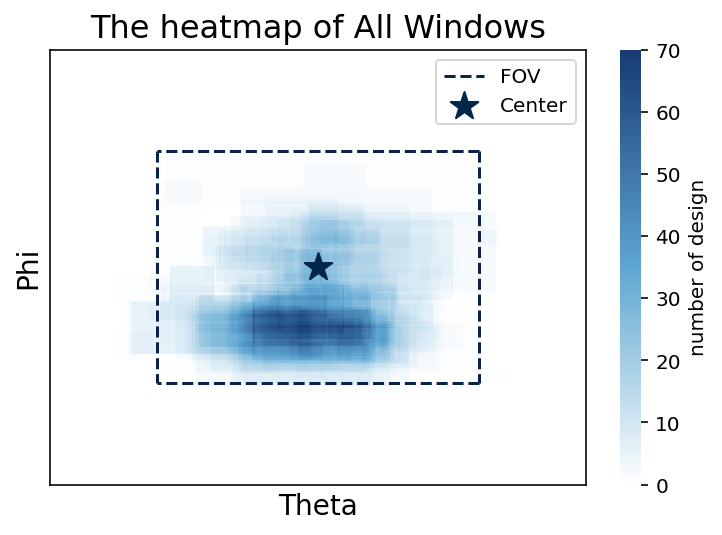

In [7]:
blue_dashcolor = '#0a234a'
### 畫全部 HeatMap
ax = sns.heatmap(heat+heat2,xticklabels=False, yticklabels=False,cmap=blues,cbar_kws={'label':'number of design'})
# green_dashcolor = '#002a11'
# ### 畫 Speaker's Video HeatMap
# ax = sns.heatmap(heat2,xticklabels=False, yticklabels=False,cmap=greens,cbar_kws={'label':'number of design'})

for _, spine in ax.spines.items():
    spine.set_visible(True)
#sns.heatmap(heat2,xticklabels=False, yticklabels=False,cmap='Reds',cbar_kws={'label':'number of user'})
plt.plot([36*math.pi/180*100, 144*math.pi/180*100], [42*math.pi/180*100, 42*math.pi/180*100], color=blue_dashcolor, linestyle='--', label='FOV')
plt.plot([36*math.pi/180*100, 144*math.pi/180*100], [138*math.pi/180*100, 138*math.pi/180*100], color=blue_dashcolor, linestyle='--')
plt.plot([36*math.pi/180*100, 36*math.pi/180*100], [42*math.pi/180*100, 138*math.pi/180*100], color=blue_dashcolor, linestyle='--')
plt.plot([144*math.pi/180*100, 144*math.pi/180*100], [42*math.pi/180*100, 138*math.pi/180*100], color=blue_dashcolor, linestyle='--')
#sns.heatmap(data,xticklabels=False, yticklabels=False)
plt.xlim(314,0)
plt.scatter(157, 157, marker='*', color='#00264a', s=210, label='Center') 
plt.legend()
plt.xlabel("Theta", fontsize=14)
plt.ylabel("Phi", fontsize=14)
plt.title("The heatmap of All Windows", fontsize=16)
print(heat[157][157])
print(heat2[157][157])

Text(0.5, 1.0, "The heatmap of Speaker's Video")

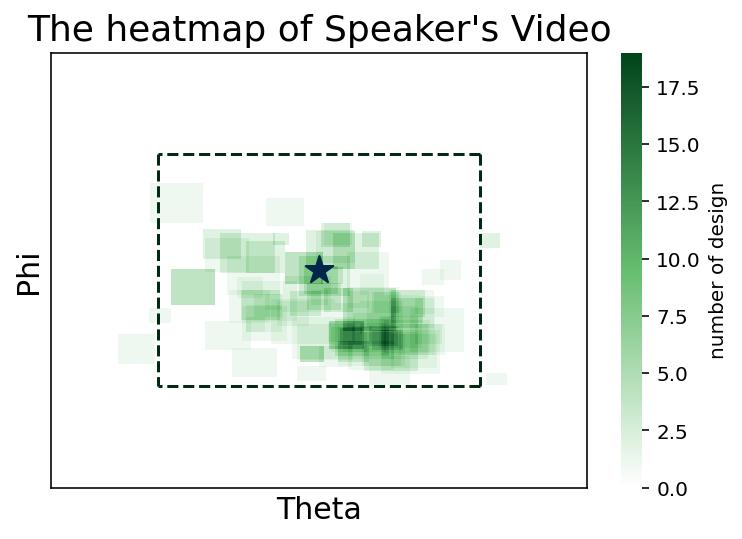

In [10]:
green_dashcolor = '#002a11'
### 畫 Speaker's Video HeatMap
ax = sns.heatmap(heat2,xticklabels=False, yticklabels=False,cmap=greens,cbar_kws={'label':'number of design'})
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.plot([36*math.pi/180*100, 144*math.pi/180*100], [42*math.pi/180*100, 42*math.pi/180*100], color=green_dashcolor, linestyle='--')
plt.plot([36*math.pi/180*100, 144*math.pi/180*100], [138*math.pi/180*100, 138*math.pi/180*100], color=green_dashcolor, linestyle='--')
plt.plot([36*math.pi/180*100, 36*math.pi/180*100], [42*math.pi/180*100, 138*math.pi/180*100], color=green_dashcolor, linestyle='--')
plt.plot([144*math.pi/180*100, 144*math.pi/180*100], [42*math.pi/180*100, 138*math.pi/180*100], color=green_dashcolor, linestyle='--')
#sns.heatmap(data,xticklabels=False, yticklabels=False)
plt.xlim(314,0)
plt.scatter(157, 157, marker='*', color='#00264a', s=210, label='Center Eye') 
#plt.legend()
plt.xlabel("Theta", fontsize=15)
plt.ylabel("Phi", fontsize=15)
plt.title("The heatmap of Speaker's Video", fontsize=18)